In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
data=pd.read_csv('student_scores.csv')

learn about data

In [53]:
data.shape

(25, 2)

In [54]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [55]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### MISSING VALUES

In [56]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Duplicate values

In [57]:
data[data.duplicated()]

,Hours,Scores


In [58]:
data.drop_duplicates(inplace=True)

In [59]:
data.shape

(25, 2)

In [60]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

### detecting outliers

In [61]:
# using iqr (inter quantile range)

In [62]:
iqr=data.Hours.quantile(0.75)-data.Hours.quantile(0.25)
upper_threshold=data.Hours.quantile(0.75)+(1.5*iqr) # q3+1.5iqr
lower_threshold=data.Hours.quantile(0.25)-(1.5*iqr)# q1-1.5iqr
print(upper_threshold)
print(lower_threshold)

14.450000000000001
-4.3500000000000005


### plotting to find task

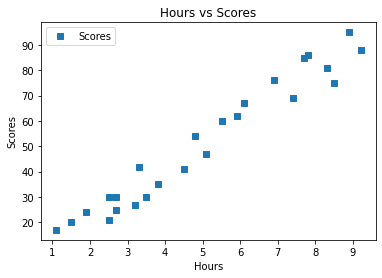

In [63]:
data.plot(x='Hours',y='Scores',style='s')
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()


##### correlation

In [64]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### SPLITTING

In [65]:
X=data.loc[:,['Hours']].values
y=data.loc[:,['Scores']].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5789)


In [66]:
y_test

array([[95],
       [21],
       [62],
       [47],
       [67],
       [54],
       [85]], dtype=int64)

In [67]:
X_train.shape,X_test.shape

((18, 1), (7, 1))

##### Normalising/Scaling the data

In [68]:
from sklearn.preprocessing import StandardScaler # importing required function
scaler=StandardScaler()
scaler.fit(X_train) # find the values of mean and variance
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [69]:
X_test

array([[ 1.63035906],
       [-0.84417801],
       [ 0.47041981],
       [ 0.16110267],
       [ 0.54774909],
       [ 0.04510875],
       [ 1.16638336]])

##### Modelling

In [70]:
from sklearn.linear_model import LinearRegression # importing all the required functions
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [71]:
print(regressor.intercept_)

[47.55555556]


In [72]:
print(regressor.coef_)

[[23.87684836]]


In [73]:
regressor.predict([[7]])

array([[214.69349407]])

In [76]:
y_pred=regressor.predict(X_test)
y_pred

array([[86.4833917 ],
       [27.39924514],
       [58.787698  ],
       [51.40217968],
       [60.63407758],
       [48.63261031],
       [75.40511422]])

In [77]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

ValueError: Per-column arrays must each be 1-dimensional

In [79]:
y_test,y_pred

(array([[95],
        [21],
        [62],
        [47],
        [67],
        [54],
        [85]], dtype=int64),
 array([[86.4833917 ],
        [27.39924514],
        [58.787698  ],
        [51.40217968],
        [60.63407758],
        [48.63261031],
        [75.40511422]]))

##### metric

In [80]:
from sklearn import metrics 
print("R2 - SCORE:",metrics.r2_score(y_test,y_pred))

R2 - SCORE: 0.9156697693394952
